In [147]:
import numpy as np
import random
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Implementation of 4 functions:
# 1 - Limiarization
# 2 - 1D Filtering
# 3 - 2D Filtering with Limiarization
# 4 - 2D Median Filter

In [139]:
def RMSE(image1, image2):
    return np.float(np.sqrt(((image1 - image2)**2).mean()))

In [140]:
def normalization(image):
    min_ = np.min(image)
    max_ = np.max(image)
    quantized_image = 255*(((image - min_)/(max_ - min_)))
    return quantized_image

In [ ]:
def padding(array, size_filter): 
    if array.ndim == 1:
        size_filter = size_filter - 1
        pad_1, pad_2 = 0,0
        while pad_1 + pad_2
    elif array.ndim == 2:
        

In [114]:
def limiarization(image, initial_threshold):
    
    filtered_image = np.zeros([image.shape[0], image.shape[1]])
    actual_threshold = initial_threshold
    diff = 1
    
    while(diff > 0.5):
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if image[i,j] > actual_threshold:
                    filtered_image[i,j] = 1
                else:
                    filtered_image[i,j] = 0

        group_of_1 = filtered_image*image
        group_of_0 = (1-filtered_image)*image
        
        new_threshold = (np.sum(group_of_1)/np.sum(filtered_image) + np.sum(group_of_0)/np.sum(1-filtered_image))/2

        diff = np.abs(new_threshold - actual_threshold)
        actual_threshold = new_threshold
    
    filtered_image = normalization(filtered_image)
    
    return filtered_image

93.34948285801919


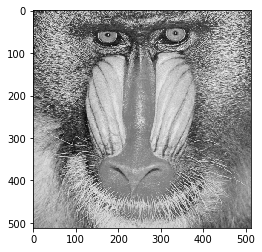

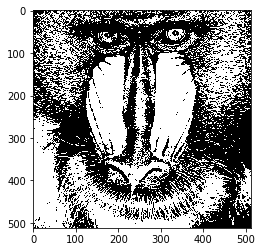

In [115]:
image_test = imageio.imread('Casos_Teste/baboon.png')
x = limiarization(image_test, 200)
_ = plt.figure(figsize=(6,4))
plt.imshow(image_test, cmap='gray');
_ = plt.figure(figsize=(6,4))
plt.imshow(x, cmap='gray');
print(RMSE(x, image_test))

In [116]:
def filter_1D(image, size_filter, weights):
    
    reshaped_image = image.reshape(-1)
    index_range = len(reshaped_image) - size_filter + 1
    padding = int((size_filter - 1)/2) # It is divided by 2 because we need a symmetric padding for an odd size filter
    reshaped_image = np.pad(reshaped_image, (padding,padding), mode='symmetric')
    
    filtered_image = []
    
    for index in range(len(reshaped_image) - size_filter + 1):
        filtered_image.append(np.sum(reshaped_image[index:size_filter+index] * weights))
    
    filtered_image = np.array(filtered_image).reshape(image.shape[0], image.shape[1])
    
    filtered_image = normalization(filtered_image)
    
    return filtered_image

68.662081757852


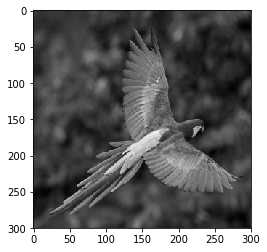

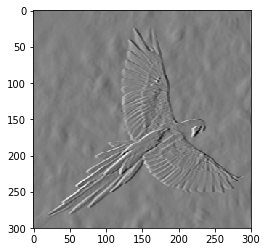

In [117]:
image_test = imageio.imread('Casos_Teste/arara.png')
x = filter_1D(image_test, 5, [-2,-1,0,1,2])
_ = plt.figure(figsize=(6,4))
plt.imshow(image_test, cmap='gray');
_ = plt.figure(figsize=(6,4))
plt.imshow(x, cmap='gray');
print(RMSE(x, image_test))

In [118]:
def filter_2D(image, size_filter, weights, threshold):
    
    padding = int((size_filter - 1)/2)
    reshaped_image = np.pad(image, ((padding, padding),(padding, padding)), mode='symmetric')
    filtered_image = []
    
    for row in range(reshaped_image.shape[0] - size_filter + 1):
        for column in range(reshaped_image.shape[1] - size_filter + 1):
            filtered_image.append(np.sum(reshaped_image[row:size_filter+row, column:size_filter+column] * weights))
    
    filtered_image = np.array(filtered_image).reshape(image.shape[0], image.shape[1])
    
    filtered_image = limiarization(filtered_image, threshold)
    
    filtered_image = normalization(filtered_image)
    
    return filtered_image

135.55978936921952


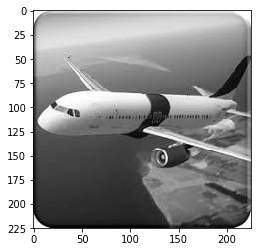

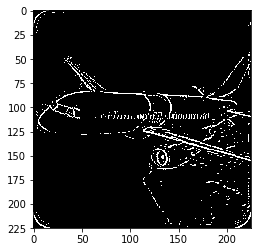

In [119]:
filter_weights = np.array([[-1,-1,-1],
                           [-1, 8,-1],
                           [-1,-1,-1]])
image_test = imageio.imread('Casos_Teste/airplane.png')
x = filter_2D(image_test, 3, filter_weights, 200)
_ = plt.figure(figsize=(6,4))
plt.imshow(image_test, cmap='gray');
_ = plt.figure(figsize=(6,4))
plt.imshow(x, cmap='gray');
print(RMSE(x, image_test))

117.17614801656522


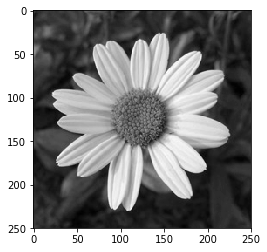

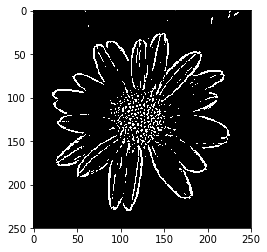

In [120]:
filter_weights = np.array([[-1,-1,-1,-1,-1],
                           [-1,-1,-1,-1,-1],
                           [-1,-1,24,-1,-1],
                           [-1,-1,-1,-1,-1],
                           [-1,-1,-1,-1,-1]])
image_test = imageio.imread('Casos_Teste/flower.png')
x = filter_2D(image_test, 5, filter_weights, 119)
_ = plt.figure(figsize=(6,4))
_ = plt.imshow(image_test, cmap='gray');
_ = plt.figure(figsize=(6,4))
plt.imshow(x, cmap='gray');
print(RMSE(x, image_test))

In [121]:
def median_filter_2D(image, size_filter):
    
    padding = int((size_filter - 1)/2)
    reshaped_image = np.pad(image, ((padding, padding),(padding, padding)), mode='constant')
    filtered_image = []
    
    for row in range(reshaped_image.shape[0] - size_filter + 1):
        for column in range(reshaped_image.shape[1] - size_filter + 1):
            filtered_image.append(np.median(reshaped_image[row:size_filter+row, column:size_filter+column]))
    
    filtered_image = np.array(filtered_image).reshape(image.shape[0], image.shape[1])
        
    filtered_image = normalization(filtered_image)
    
    return filtered_image

43.20841866897025


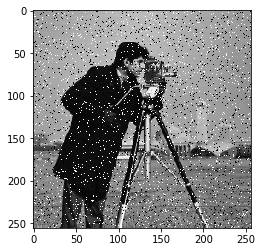

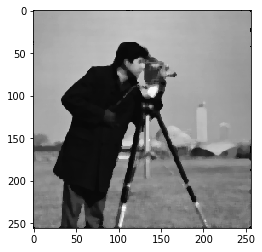

In [122]:
image_test = imageio.imread('Casos_Teste/camera_saltpepper.png')
x = median_filter_2D(image_test, 5)

_ = plt.figure(figsize=(6,4))
plt.imshow(image_test, cmap='gray');
_ = plt.figure(figsize=(6,4))
plt.imshow(x, cmap='gray');
print(RMSE(x, image_test))